 HERE1
distance
 [[ 0. 19. 20.]
 [19.  0. 37.]
 [20. 37.  0.]]
[(78.52531140389178, 78.58593575262115), (96.91360175228525, 74.80597729095652), (65.55508092911096, 93.88845441671913)] @@  ['r', 'r', 'r']
{(0, 1): 19.0, (0, 2): 20.0, (1, 2): 37.0} $$$
{(0, 1): Text(87.71945657808851, 76.69595652178884, '19.0'), (0, 2): Text(72.04019616650137, 86.23719508467013, '20.0'), (1, 2): Text(81.23434134069811, 84.34721585383782, '37.0')} TTTTT
order = (0, 1, 2) Distance = 76.0
Best order from brute force = (0, 1, 2) with total distance = 76.0


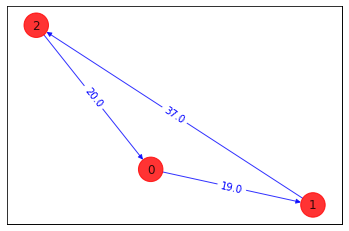

In [6]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
#################################################2
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True) #Whether the Axes frame is visible.
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos) #draws graph
   
    edge_labels = nx.get_edge_attributes(G, "weight")
    print(edge_labels,"$$$")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels) #adds edges
    print(nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels),"TTTTT")
    #Edge labels in a dictionary keyed by edge two-tuple of text labels (default=None). Only labels for the keys in the dictionary are drawn.
###########################1
n = 3
tsp = Tsp.create_random_instance(n, seed=124) #Seed helps determine weight of edges between nodes
print(tsp.graph,"HERE1")
adj_matrix = nx.to_numpy_matrix(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes] #color of nodes
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes] #A dictionary with nodes as keys and positions as values. Positions should be sequences of length 2.
print(pos,"@@ ",colors)
draw_graph(tsp.graph, colors, pos)
#####################################4


from itertools import permutations


def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order
############3

best_distance, best_order = brute_force_tsp(adj_matrix, n)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)
###################5

def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)

#########################
